# # Problem statement.
Build a recommender system by using cosine simillarties score.

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [9]:
book=pd.read_csv(r"E:\assignments csv  files\book (1).csv",encoding="ISO-8859-1")

In [10]:
book.head()


,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [11]:
book.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [12]:

book=book.drop("Unnamed: 0",axis=1)
book=book.rename(columns={"User.ID":"user_id","Book.Title":"book_title","Book.Rating":"book_rating"})


In [13]:

book.head()


,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [14]:
book.shape

(10000, 3)

In [15]:
len(book.user_id.unique())


2182

In [16]:
book.book_rating.describe()


count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: book_rating, dtype: float64

In [17]:
book.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  int64 
 1   book_title   10000 non-null  object
 2   book_rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [18]:
book.columns


Index(['user_id', 'book_title', 'book_rating'], dtype='object')

In [19]:
book.isnull().sum()

user_id        0
book_title     0
book_rating    0
dtype: int64

In [20]:
book[book.duplicated()]

,user_id,book_title,book_rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [21]:
book=book.drop_duplicates()
book

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [22]:

book.groupby("book_title")["book_rating"].agg("mean")

book_title
 Jason, Madison &amp                                                       8.0
 Other Stories;Merril;1985;McClelland &amp                                 6.0
 Repairing PC Drives &amp                                                  4.0
'48                                                                        7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      8.0
                                                                          ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    8.0
\Well, there's your problem\: Cartoons                                     9.0
iI Paradiso Degli Orchi                                                    7.0
stardust                                                                   5.0
Ã?Â?bermorgen.                                                             4.0
Name: book_rating, Length: 9659, dtype: float64

In [23]:

book.groupby("book_title")["book_rating"].agg("count")

book_title
 Jason, Madison &amp                                                       1
 Other Stories;Merril;1985;McClelland &amp                                 1
 Repairing PC Drives &amp                                                  1
'48                                                                        1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      1
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    1
\Well, there's your problem\: Cartoons                                     1
iI Paradiso Degli Orchi                                                    1
stardust                                                                   1
Ã?Â?bermorgen.                                                             1
Name: book_rating, Length: 9659, dtype: int64

In [24]:
a=pd.array(book.groupby("book_title")["book_rating"].mean())
b=pd.array(book.groupby("book_title")["book_rating"].count())

In [25]:

ratings = pd.DataFrame(book.groupby('book_title')['book_rating'].agg('mean')).iloc[:,1:]
ratings["avg_rating"]=a
ratings["total_count"]=b
ratings

,avg_rating,total_count
book_title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


<Axes: xlabel='avg_rating', ylabel='Count'>

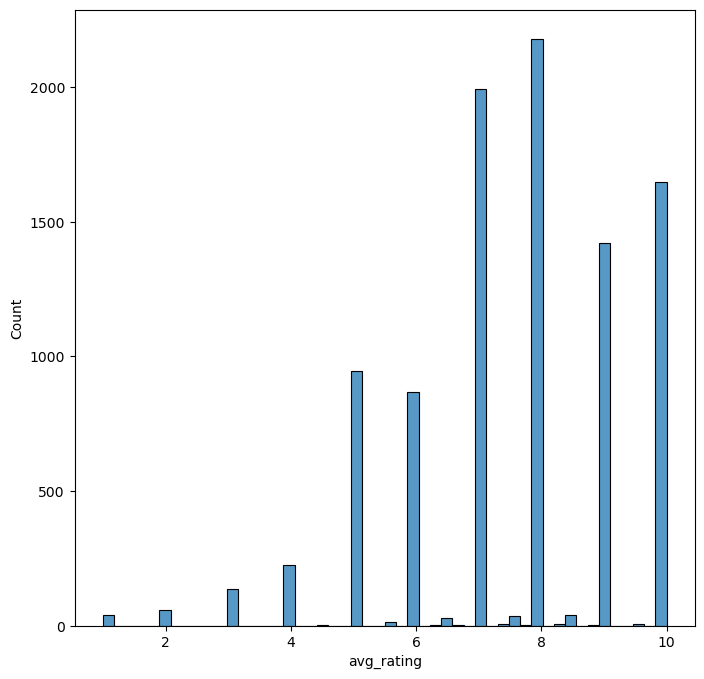

In [26]:
plt.figure(figsize=(8,8))
sns.histplot(ratings.avg_rating,bins=50)

<Axes: xlabel='total_count', ylabel='Count'>

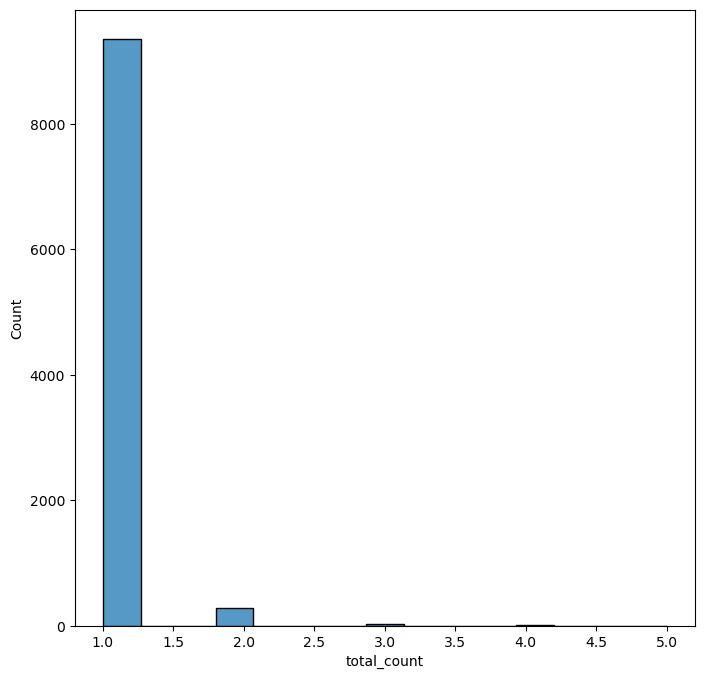

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(ratings.total_count)

In [28]:
user_book_df=book.pivot_table(index="user_id",columns="book_title",values="book_rating").fillna(0)
user_book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [ ]:
user_sim=1-pairwise_distances(user_book_df.values,metric=cosine)
user_sim

In [ ]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

In [ ]:
user_sim_df.index=list(user_book_df.index)
user_sim_df.columns=list(user_book_df.index)
user_sim_df

In [ ]:
np.fill_diagonal(user_sim,0)
user_sim_df

In [ ]:
user=[]
user1=[]
similar=[]
for col in user_sim_df.columns:
  for row in user_sim_df.index:
    if user_sim_df[col][row]>0.1:
      user.append(col)
      user1.append(row)
      similar.append(user_sim_df[col][row])  

In [ ]:
similar_users=pd.DataFrame()

similar_users["user"]=user
similar_users["user1"]=user1
similar_users["similarity"]=similar
similar_users

In [ ]:
similar_users.sort_values(["similarity"],ascending=False).head(20)

In [ ]:

book[(book['user_id']==3951) | (book['user_id']==276934)] # similarity = 1

In [ ]:
book[(book['user_id']==160926) | (book['user_id']==1348)] #similarity = 0.752577